### Schelling Segregation model
This example of implementation of Schelling Segregation model is adapted from https://colab.research.google.com/github/QuantEcon/lecture-python.notebooks/blob/master/schelling.ipynb

In 1969, Thomas C. Schelling developed a simple but striking model of racial segregation [Sch69].

His model studies the dynamics of racially mixed neighborhoods.

Like much of Schelling’s work, the model shows how local interactions can lead to surprising aggregate structure.

In particular, it shows that relatively mild preference for neighbors of similar race can lead in aggregate to the collapse of mixed neighborhoods, and high levels of segregation.

In recognition of this and other research, Schelling was awarded the 2005 Nobel Prize in Economic Sciences (joint with Robert Aumann).

In [1]:
# Import necessary libraries
from random import uniform, seed
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

## The Model



### Set-Up

Suppose we have two types of people: orange people and green people.

For the purpose of this lecture, we will assume there are 250 of each type.

These agents all live on a single unit square.

The location of an agent is just a point $ (x, y) $,  where $ 0 < x, y < 1 $.

### Preferences

We will say that an agent is *happy* if half or more of her 10 nearest neighbors are of the same type.

Here ‘nearest’ is in terms of [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance).

An agent who is not happy is called *unhappy*.

An important point here is that agents are not averse to living in mixed areas.

They are perfectly happy if half their neighbors are of the other color.

### Behavior

Initially, agents are mixed together (integrated).

In particular, the initial location of each agent is an independent draw from a bivariate uniform distribution on $ S = (0, 1)^2 $.

Now, cycling through the set of all agents, each agent is now given the chance to stay or move.

We assume that each agent will stay put if they are happy and move if unhappy.

The algorithm for moving is as follows

1. Draw a random location in $ S $  
1. If happy at new location, move there  
1. Else, go to step 1  


In this way, we cycle continuously through the agents, moving as required.

We continue to cycle until no one wishes to move.

In [2]:
seed(10)  # For reproducible random numbers

class Agent:
    def __init__(self, type):
        self.type = type
        self.draw_location()

    def draw_location(self):
        self.location = uniform(0, 1), uniform(0, 1)

    def get_distance(self, other):
        "Computes the euclidean distance between self and other agent."
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)

    def happy(self, agents):
        "True if sufficient number of nearest neighbors are of the same type."
        distances = []
        # distances is a list of pairs (d, agent), where d is distance from
        # agent to self
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        # == Sort from smallest to largest, according to distance == #
        distances.sort()
        # == Extract the neighboring agents == #
        neighbors = [agent for d, agent in distances[:num_neighbors]]
        # == Count how many neighbors have the same type as self == #
        num_same_type = sum(self.type == agent.type for agent in neighbors)
        return num_same_type >= require_same_type

    def update(self, agents):
        "If not happy, then randomly choose new locations until happy."
        while not self.happy(agents):
            self.draw_location()





In [3]:
def plot_distribution(agents, cycle_num):
    "Plot the distribution of agents after cycle_num rounds of the loop."
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    # == Obtain locations of each type == #
    for agent in agents:
        x, y = agent.location
        if agent.type == 0:
            x_values_0.append(x)
            y_values_0.append(y)
        else:
            x_values_1.append(x)
            y_values_1.append(y)
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_args = {'markersize': 8, 'alpha': 0.6}
    ax.set_facecolor('azure')
    ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='orange', **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', markerfacecolor='green', **plot_args)
    ax.set_title(f'Cycle {cycle_num-1}')
    plt.show()


Entering loop  1


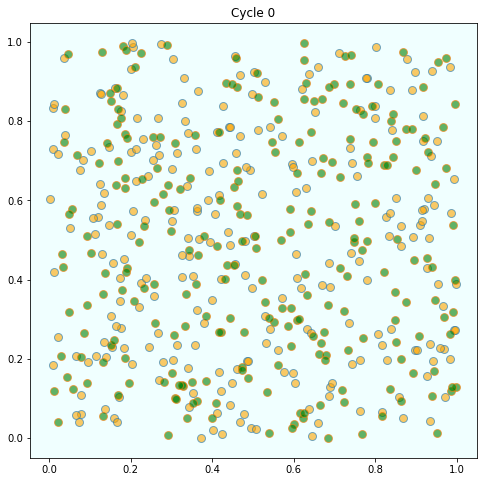

Entering loop  2


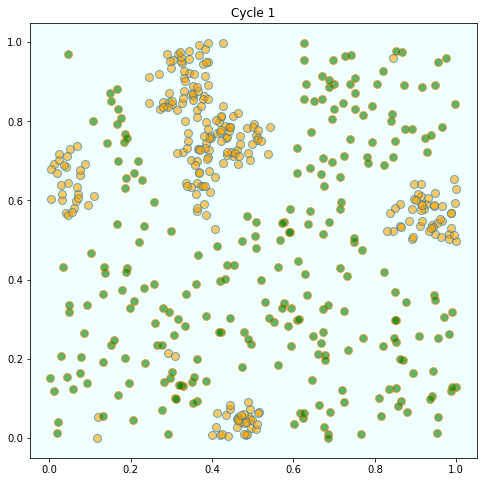

Entering loop  3


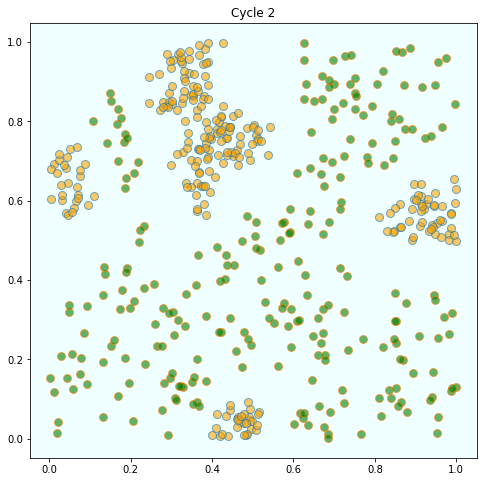

Entering loop  4


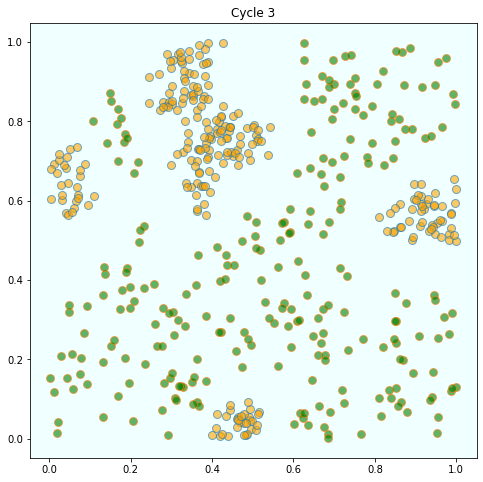

Entering loop  5


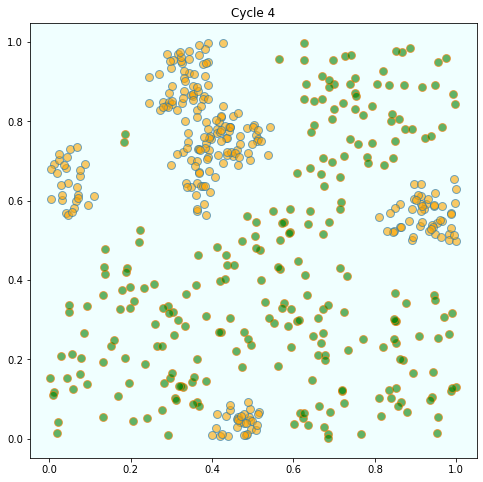

Entering loop  6


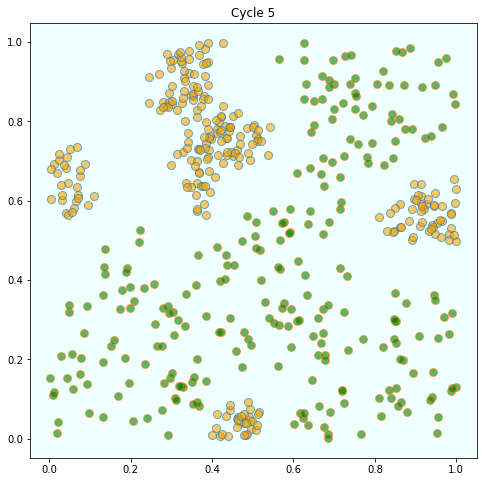

Converged, terminating.


In [5]:
num_of_type_0 = 250
num_of_type_1 = 250
num_neighbors = 10      # Number of agents regarded as neighbors
require_same_type = 8   # Want at least this many neighbors to be same type

# == Create a list of agents == #
agents = []

for i in range(num_of_type_0):
    agents.append(Agent(0)) # Add agents of type 0 to the list
    
for i in range(num_of_type_1):
    agents.append(Agent(1)) # Add agents of type 1 to the list

# Note: you can also do this with Python comprehensions
#agents = [Agent(0) for i in range(num_of_type_0)]
#agents.extend(Agent(1) for i in range(num_of_type_1))


count = 1
# ==  Loop until none wishes to move == #
while True:
    print('Entering loop ', count)
    plot_distribution(agents, count)
    
    count += 1
    no_one_moved = True
    for agent in agents:
        old_location = agent.location
        agent.update(agents)
        if agent.location != old_location:
            no_one_moved = False
    if no_one_moved:
        break

print('Converged, terminating.')